In [2]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

In [3]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key']

In [4]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status', parse_dates = ['created_date'], usecols = columns_used)

In [5]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-17 16:57:37,44081416,HEAT/HOT WATER,"10,463.000",225 WEST 232 STREET,WEST 232 STREET,BRONX,BRONX,40.880,-73.904,RESIDENTIAL BUILDING
1,2019-10-17 18:04:24,44082732,HEAT/HOT WATER,"10,032.000",261 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.844,-73.941,RESIDENTIAL BUILDING
2,2019-10-17 22:40:04,44081467,HEAT/HOT WATER,"10,033.000",350 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.847,-73.940,RESIDENTIAL BUILDING
3,2019-10-17 09:47:43,44080113,HEAT/HOT WATER,"11,211.000",276 SOUTH 1 STREET,SOUTH 1 STREET,BROOKLYN,BROOKLYN,40.712,-73.956,RESIDENTIAL BUILDING
4,2019-10-17 10:24:21,44081316,HEAT/HOT WATER,"10,021.000",530 EAST 76 STREET,EAST 76 STREET,NEW YORK,MANHATTAN,40.769,-73.951,RESIDENTIAL BUILDING


In [6]:
df.shape

(1912961, 11)

In [7]:

df.dtypes

created_date        datetime64[ns]
unique_key                   int64
complaint_type              object
incident_zip               float64
incident_address            object
street_name                 object
city                        object
borough                     object
latitude                   float64
longitude                  float64
location_type               object
dtype: object

In [8]:
df['complaint_type'].value_counts()

HEATING                   558489
GENERAL CONSTRUCTION      361749
PLUMBING                  306572
PAINT - PLASTER           264198
NONCONST                  193254
ELECTRIC                  110017
HPD Literature Request     52830
APPLIANCE                  35176
HEAT/HOT WATER             10600
UNSANITARY CONDITION        5857
CONSTRUCTION                3677
PAINT/PLASTER               2758
WATER LEAK                  2646
DOOR/WINDOW                 2017
GENERAL                     1279
FLOORING/STAIRS             1048
SAFETY                       595
ELEVATOR                     102
OUTSIDE BUILDING              51
Unsanitary Condition          25
General                       15
Safety                         4
Appliance                      1
AGENCY                         1
Name: complaint_type, dtype: int64

In [9]:
df_complaint_type = df['complaint_type'].value_counts()
df_complaint_type.sort_values(ascending = True, inplace =True)
Total_complaint = df_complaint_type.sum()

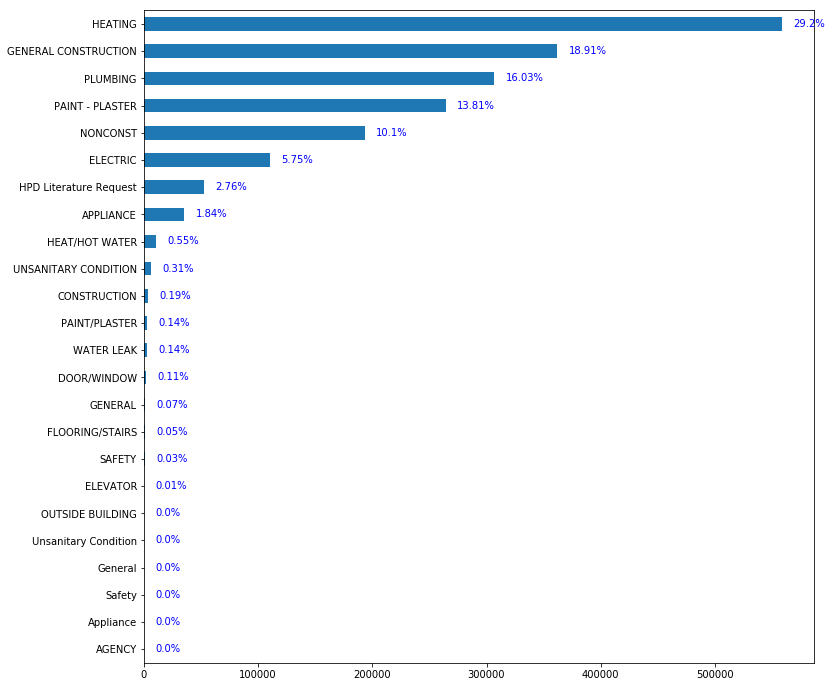

In [11]:
# Create the barh plot
df_complaint_type.plot(kind = 'barh', figsize = (12,12))

for index, value in enumerate(df_complaint_type):
    label =  '{}%'.format(round((value/Total_complaint)*100, 2)) 
    plt.annotate(label, xy=(value + 10000, index-0.1), color='blue')
    
plt.show()

# The top complain is heating.